In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [2]:
conn = sqlite3.connect("inventory.db")

df = pd.read_sql_query("select * from vendor_table_summary",conn)
df

,vendorname,vendornumber,brand,description,purchaseprice,volume,actualprice,totalquantity,totalpurchasedollars,totalsalesdollars,totalsalesprice,totalsalesquantity,totalexcisetax,total_freight,grossprofit,profitmargin,stockturnover,sales/purchase_ratio
0,PROXIMO SPIRITS INC.,7245,3065,Three Olives Grape Vodka,0.71,50.0,0.99,1,0.71,85.14,33.66,86.0,4.46,38994.78,84.43,99.166079,86.000000,119.915493
1,DIAGEO NORTH AMERICA INC,3960,6127,The Club Strawbry Margarita,1.47,200.0,1.99,1,1.47,143.28,77.61,72.0,15.12,257032.07,141.81,98.974037,72.000000,97.469388
2,HEAVEN HILL DISTILLERIES,3924,9123,Deep Eddy Vodka,0.74,50.0,0.99,2,1.48,1.98,0.99,2.0,0.10,14069.87,0.50,25.252525,1.000000,1.337838
3,SAZERAC CO INC,8004,5683,Dr McGillicuddy's Apple Pie,0.39,50.0,0.49,6,2.34,65.66,1.47,134.0,7.04,50293.62,63.32,96.436186,22.333333,28.059829
4,WINE GROUP INC,9815,8527,Concannon Glen Ellen Wh Zin,1.32,750.0,4.99,2,2.64,15.95,10.96,5.0,0.55,27100.41,13.31,83.448276,2.500000,6.041667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,DIAGEO NORTH AMERICA INC,3960,3545,Ketel One Vodka,21.89,1750.0,29.99,138109,3023206.01,4223107.62,545778.28,135838.0,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
10688,DIAGEO NORTH AMERICA INC,3960,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682,3261197.94,4475972.88,420050.01,200412.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
10689,PERNOD RICARD USA,17035,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407,3418303.68,4538120.60,461140.15,187140.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
10690,MARTIGNETTI COMPANIES,4425,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038,3804041.22,4819073.49,561512.37,160247.0,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830


In [3]:
# summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vendornumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
purchaseprice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
actualprice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
totalquantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
totalpurchasedollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
totalsalesdollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
totalsalesprice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05
totalsalesquantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05


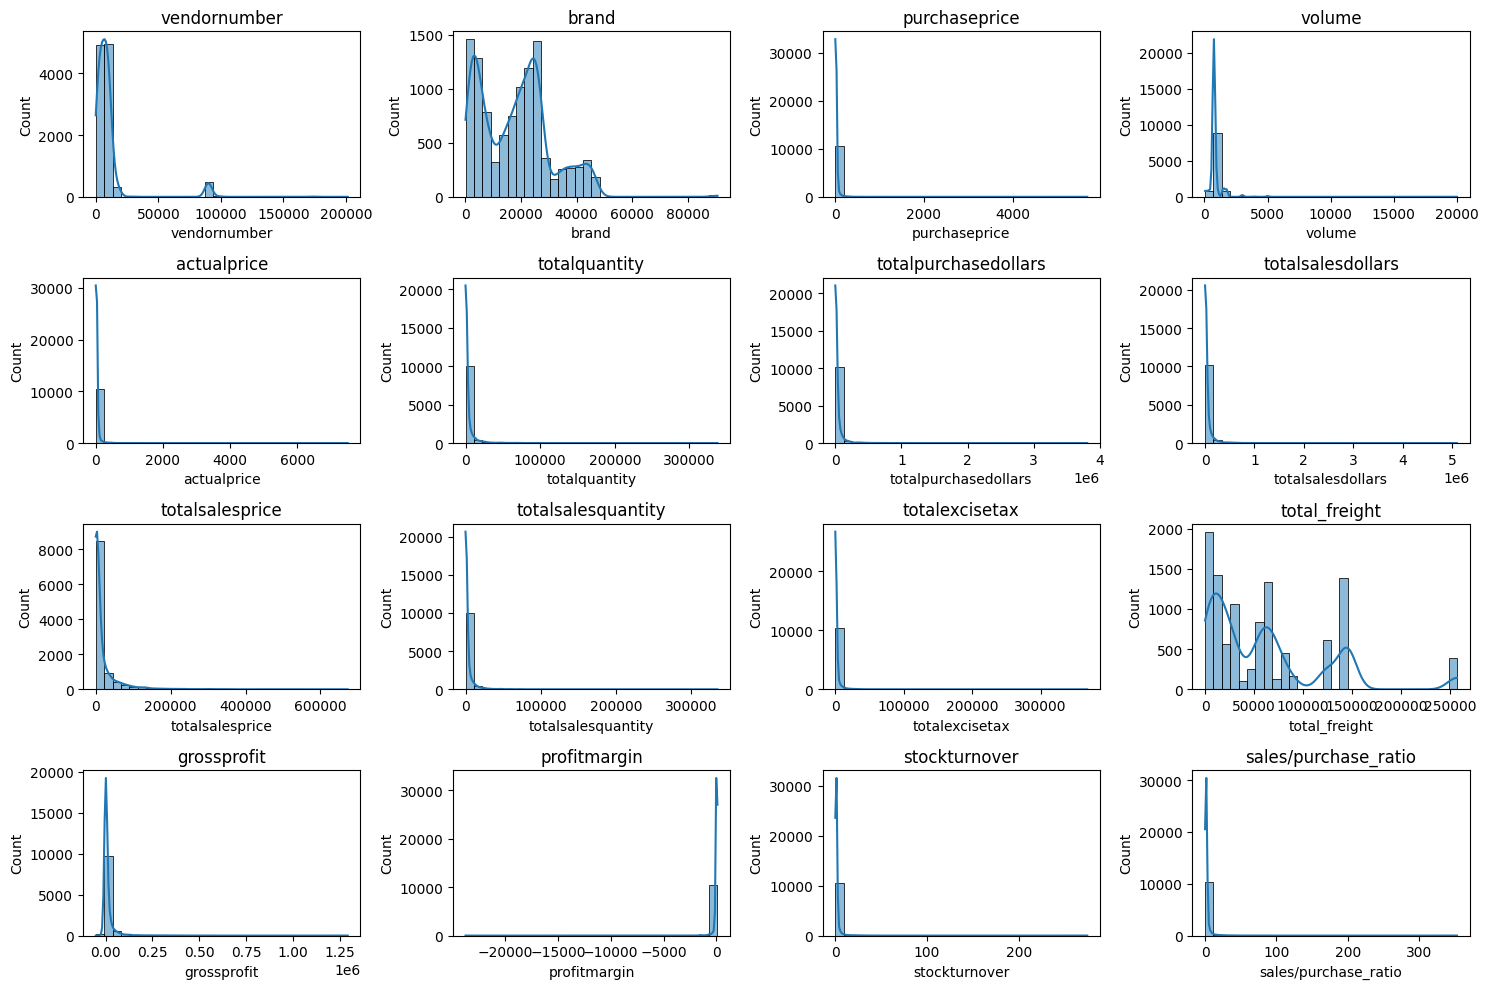

In [4]:
numerical_cols = df.select_dtypes(include = np.number).columns
numerical_cols

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

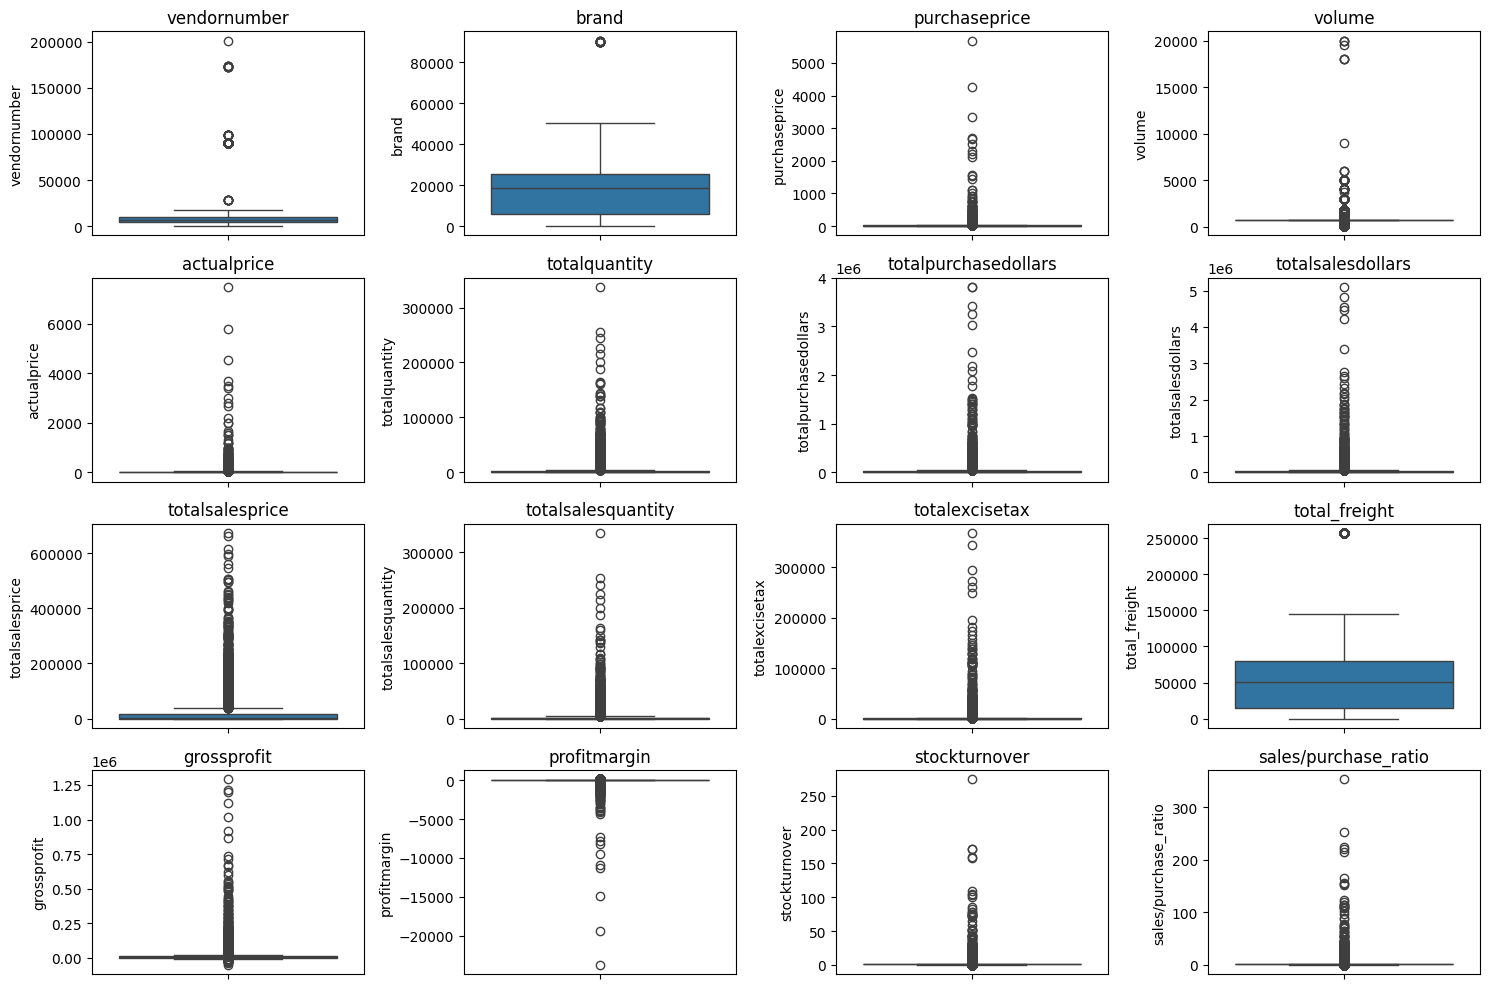

In [5]:
numerical_cols = df.select_dtypes(include = np.number).columns
numerical_cols

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

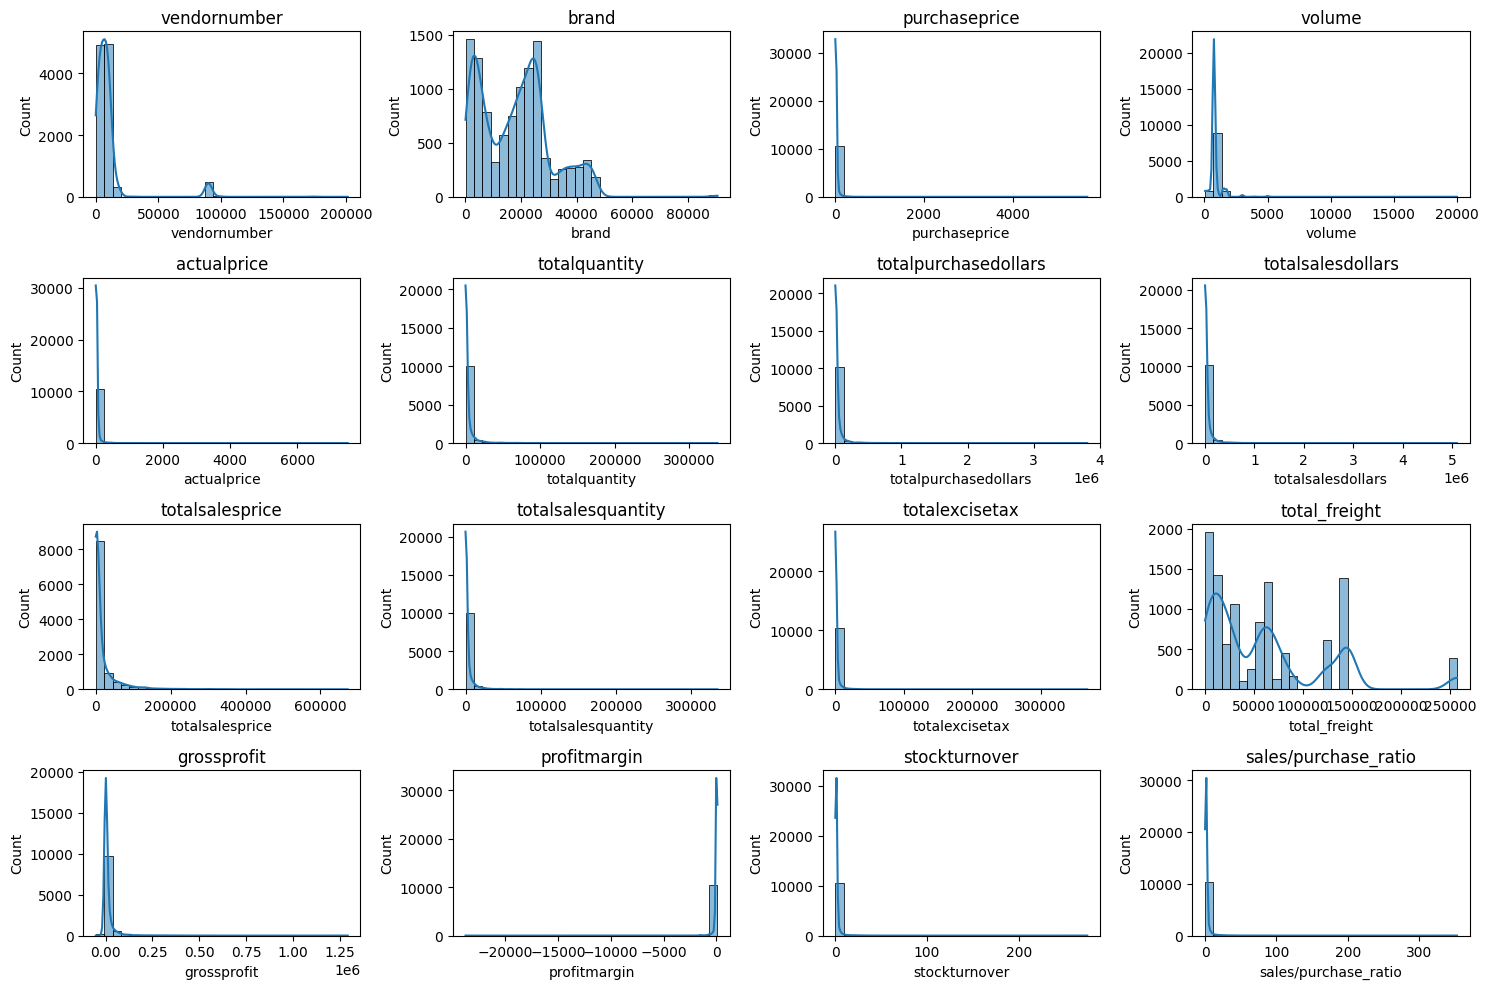

In [6]:
numerical_cols = df.select_dtypes(include = np.number).columns
numerical_cols

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

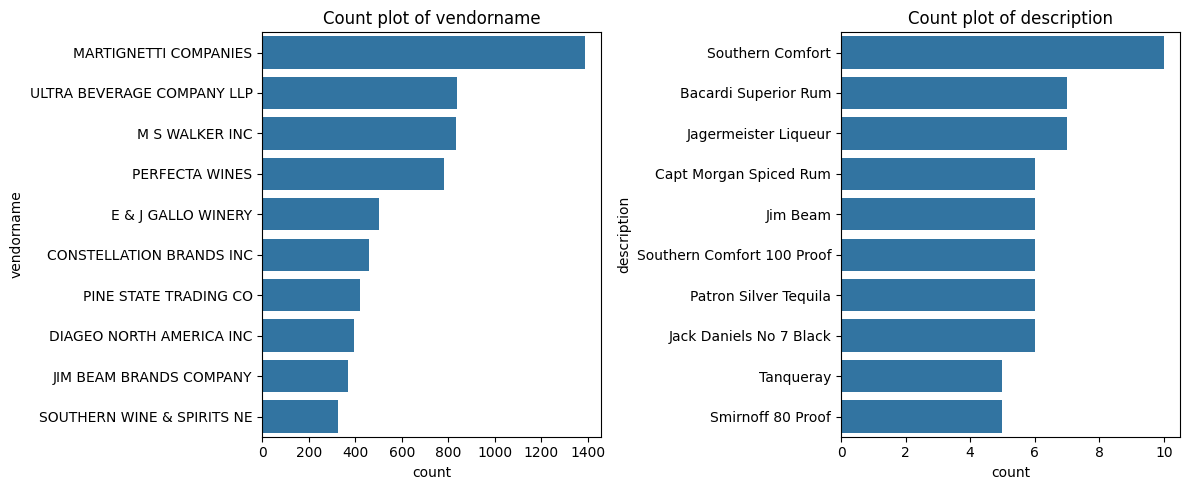

In [7]:
categorical_cols = ['vendorname','description']

plt.figure(figsize=(12,5))

for i , col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10])
    plt.title(f"Count plot of {col}")
plt.tight_layout()
plt.show()

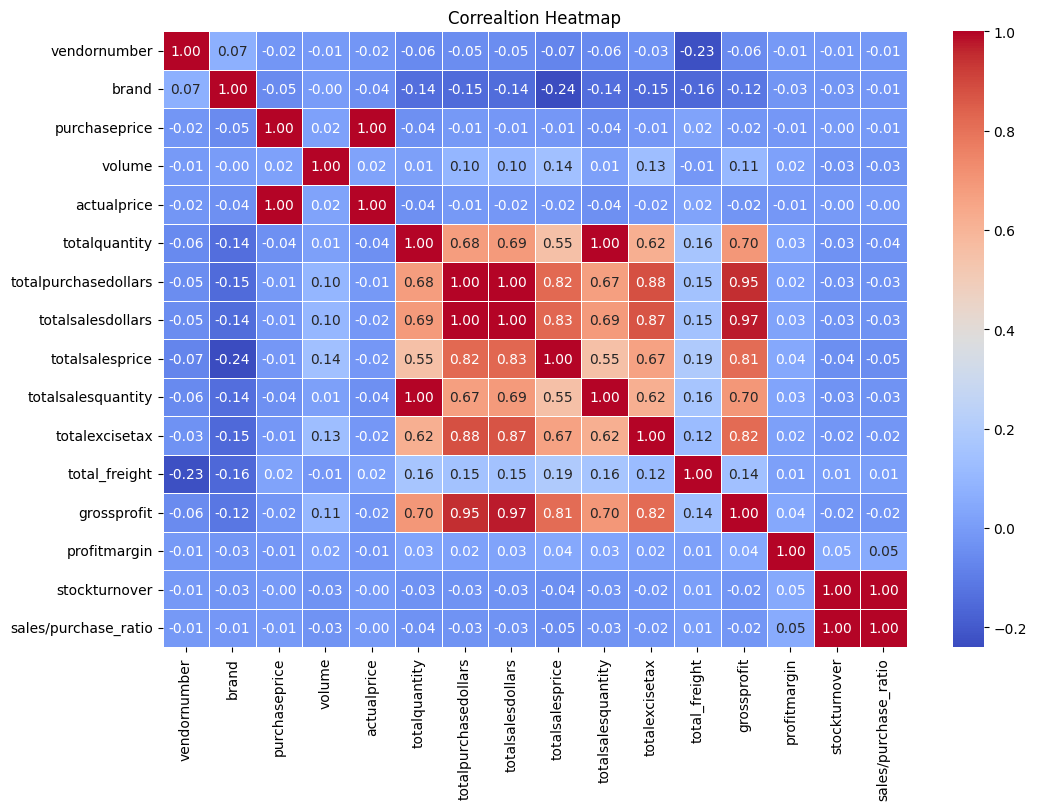

In [8]:
#correlation heatmap

plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidth=0.5)
plt.title("Correaltion Heatmap")
plt.show()

# Data Analysis

Identify brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins

In [12]:
brand_performance = df.groupby('description').agg({ 
    'totalsalesdollars':'sum',
    'profitmargin':'mean'}).reset_index()

In [13]:
low_sales_threshold = brand_performance['totalsalesdollars'].quantile(0.15)
high_margin_threshold = brand_performance['profitmargin'].quantile(0.85)

In [20]:
brand_performance['adjust'] =  np.where(
    (brand_performance['totalsalesdollars'] <= low_sales_threshold) &
    (brand_performance['profitmargin'] >= high_margin_threshold),
    'Yes',  # value if condition is True
    'No'    # value if condition is false
)

In [22]:
brand_performance.to_sql('scatter_plot_table',conn,if_exists='replace',index=False)

4162

In [14]:
#filter brands with low sales and high profit margins
target_brands = brand_performance[
    (brand_performance['totalsalesdollars']<=low_sales_threshold)&
    (brand_performance['profitmargin']>=high_margin_threshold)]

In [15]:
target_brands.sort_values('totalsalesdollars')

,description,totalsalesdollars,profitmargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [16]:
brand_performance = brand_performance[brand_performance['totalsalesdollars']<10000]

In [27]:
brand_performance

,description,totalsalesdollars,profitmargin,adjust
1,.nparalleled Svgn Blanc,1094.63,29.978166,No
2,10 Span Cab Svgn CC,2703.89,20.937612,No
3,10 Span Chard CC,3325.56,27.806445,No
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182,No
5,10 Span Pnt Nr CC,2441.74,25.836084,No
...,...,...,...,...
7695,Zonin Prosecco Brut,4382.28,31.290561,No
7696,Zorah Red,417.81,67.559417,Yes
7703,Zuccardi Q Malbec,1639.18,23.981503,No
7705,Zwack Liqueur,227.88,16.653502,No


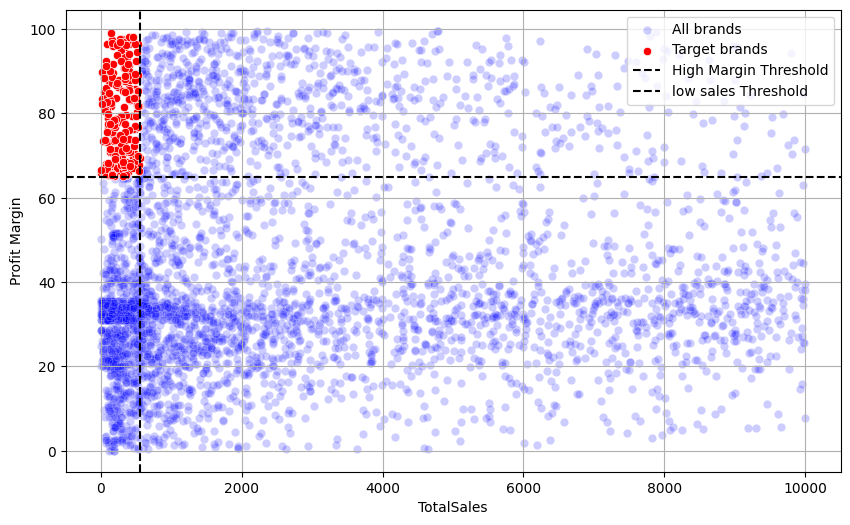

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = brand_performance,x='totalsalesdollars',y='profitmargin',color='blue',label='All brands',alpha=0.2)
sns.scatterplot(data = target_brands,x='totalsalesdollars',y='profitmargin',color='red',label='Target brands')

plt.axhline(high_margin_threshold, linestyle='--',color='black',label = 'High Margin Threshold')
plt.axvline(low_sales_threshold, linestyle='--',color='black',label = 'low sales Threshold')

plt.xlabel('TotalSales')
plt.ylabel('Profit Margin')
plt.grid(True)
plt.legend()
plt.show()

Which vendors and brands demonstrate the highest sales performance

In [19]:
top_vendors=df.groupby('vendorname')['totalsalesdollars'].sum().nlargest(10)
top_brands=df.groupby('description')['totalsalesdollars'].sum().nlargest(10)

In [20]:
def format_dollars(val):
    if val>=1000000:
        return f'{val/1000000:.2f} M'
    if val>=1000:
        return f'{val/1000:.2f} K'
    return val

In [21]:
top_brands.apply(lambda x: format_dollars(x))

description
Jack Daniels No 7 Black    7.96 M
Tito's Handmade Vodka      7.40 M
Grey Goose Vodka           7.21 M
Capt Morgan Spiced Rum     6.36 M
Absolut 80 Proof           6.24 M
Jameson Irish Whiskey      5.72 M
Ketel One Vodka            5.07 M
Baileys Irish Cream        4.15 M
Kahlua                     3.60 M
Tanqueray                  3.46 M
Name: totalsalesdollars, dtype: object

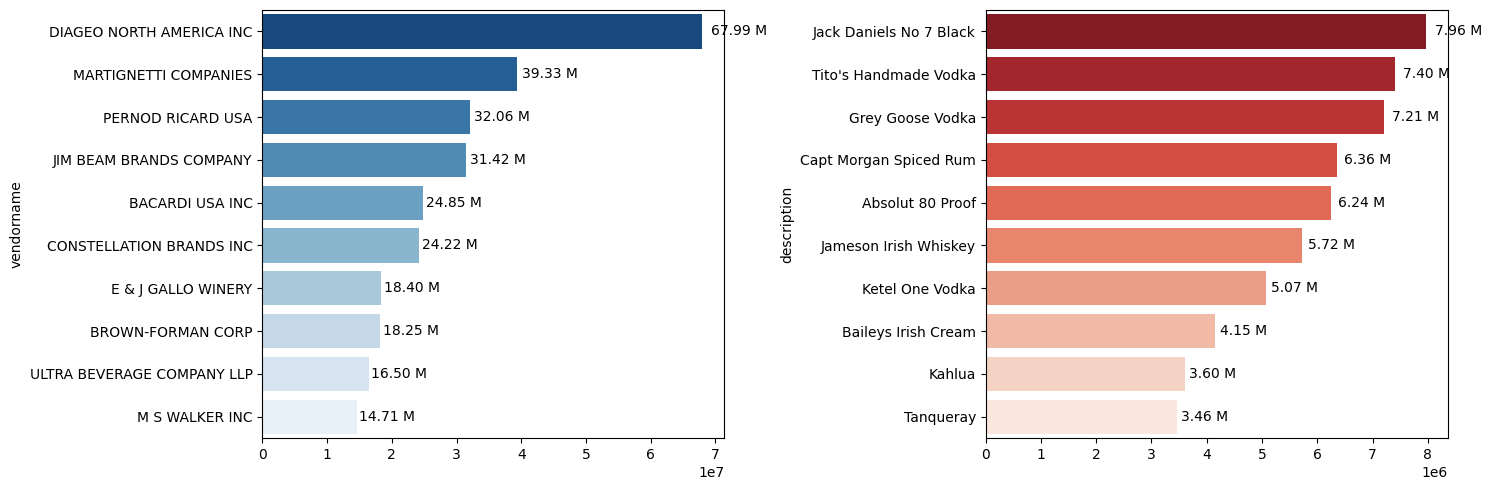

In [22]:
plt.figure(figsize=(15,5))

# plot for top vendors

plt.subplot(1,2,1)
ax1 = sns.barplot(y=top_vendors.index,x=top_vendors.values,palette='Blues_r')
for i in ax1.patches:
    ax1.text(i.get_width()+i.get_width()*0.02,
             i.get_y()+i.get_height()/2,
            format_dollars(i.get_width()),
            ha='left',va='center',fontsize=10,color='black')

# plot for top brands

plt.subplot(1,2,2)
ax2 = sns.barplot(y=top_brands.index,x=top_brands.values,palette='Reds_r')
for i in ax2.patches:
    ax2.text(i.get_width()+i.get_width()*0.02,
             i.get_y()+i.get_height()/2,
            format_dollars(i.get_width()),
            ha='left',va='center',fontsize=10,color='black')
plt.tight_layout()
plt.show()

Which vendors contribute to total purchase dollars

In [23]:
vendor_performance = df.groupby('vendorname').agg({'totalpurchasedollars':'sum',
                             'grossprofit':'sum',
                             'totalsalesdollars':'sum'}).reset_index()

In [24]:
vendor_performance['purchase_contribution'] = vendor_performance['totalpurchasedollars']/vendor_performance['totalpurchasedollars'].sum()

In [25]:
top_vendors = round(vendor_performance.sort_values('purchase_contribution',ascending=False),2).head(10)

In [26]:
top_vendors['totalpurchasedollars'] = top_vendors['totalpurchasedollars'].apply(lambda x: format_dollars(x))
top_vendors['grossprofit'] = top_vendors['grossprofit'].apply(lambda x: format_dollars(x))
top_vendors['totalsalesdollars'] = top_vendors['totalsalesdollars'].apply(lambda x: format_dollars(x))

In [27]:
top_vendors

,vendorname,totalpurchasedollars,grossprofit,totalsalesdollars,purchase_contribution
25,DIAGEO NORTH AMERICA INC,50.10 M,17.89 M,67.99 M,0.16
57,MARTIGNETTI COMPANIES,25.50 M,13.83 M,39.33 M,0.08
68,PERNOD RICARD USA,23.85 M,8.21 M,32.06 M,0.08
46,JIM BEAM BRANDS COMPANY,23.49 M,7.93 M,31.42 M,0.08
6,BACARDI USA INC,17.43 M,7.42 M,24.85 M,0.06
20,CONSTELLATION BRANDS INC,15.27 M,8.95 M,24.22 M,0.05
11,BROWN-FORMAN CORP,13.24 M,5.01 M,18.25 M,0.04
30,E & J GALLO WINERY,12.07 M,6.33 M,18.40 M,0.04
106,ULTRA BEVERAGE COMPANY LLP,11.17 M,5.34 M,16.50 M,0.04
53,M S WALKER INC,9.76 M,4.94 M,14.71 M,0.03


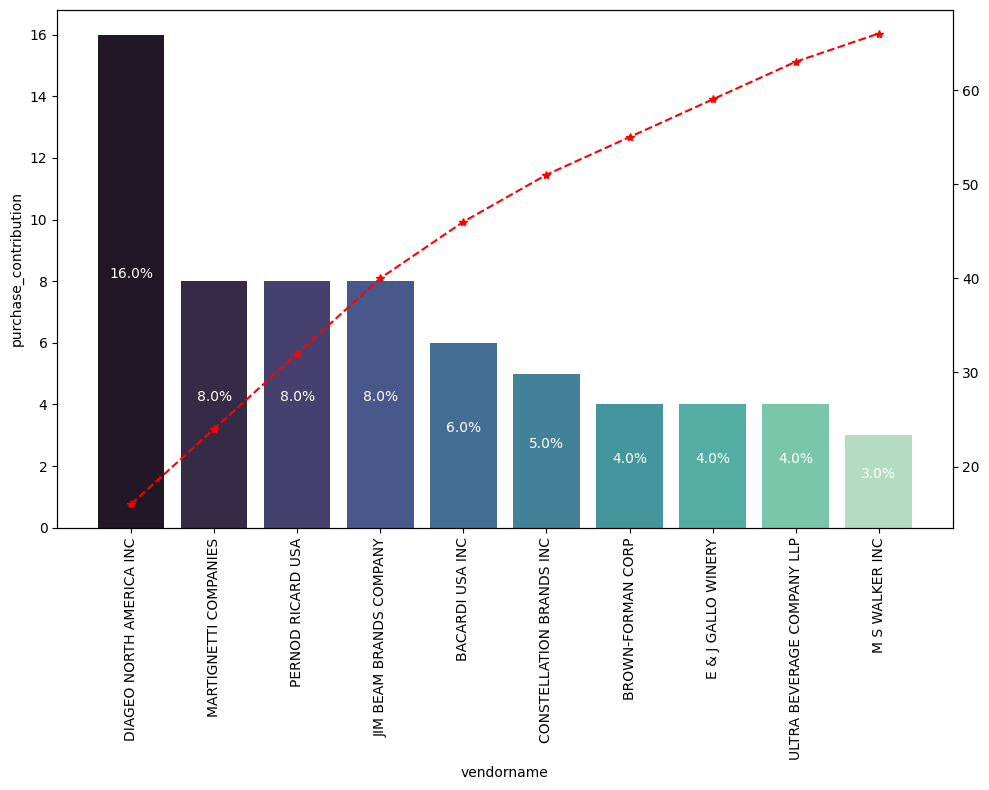

In [28]:
top_vendors['cumulative_contribution'] = (top_vendors['purchase_contribution']*100).cumsum()
fig, ax1 = plt.subplots(figsize=(10,8))
#barplot for purchase contribution

bars = sns.barplot(x=top_vendors['vendorname'],y=top_vendors['purchase_contribution']*100,palette='mako',ax = ax1)

for bar in bars.patches:
    height = bar.get_height()  # Height of the bar
    ax1.text(
        bar.get_x() + bar.get_width()/2,  # x-center of the bar
        height - (0.5*height),           # slightly below top for visibility
        f'{height:.1f}%',                 # label text
        ha='center', va='bottom', color='white', fontsize=10
    )

ax1.set_xticklabels(top_vendors['vendorname'],rotation=90)

ax2=ax1.twinx()
ax2.plot(top_vendors['vendorname'],top_vendors['cumulative_contribution'],color='red',marker='*',linestyle = '--',label='cumulative')
plt.tight_layout()
plt.show()

How much of total procurement is dependent on the top vendors ?

In [29]:
print(f'Total Purchase contribution of top vendors is {round(top_vendors['purchase_contribution'].sum(),2)*100}')

Total Purchase contribution of top vendors is 66.0


<function matplotlib.pyplot.show(close=None, block=None)>

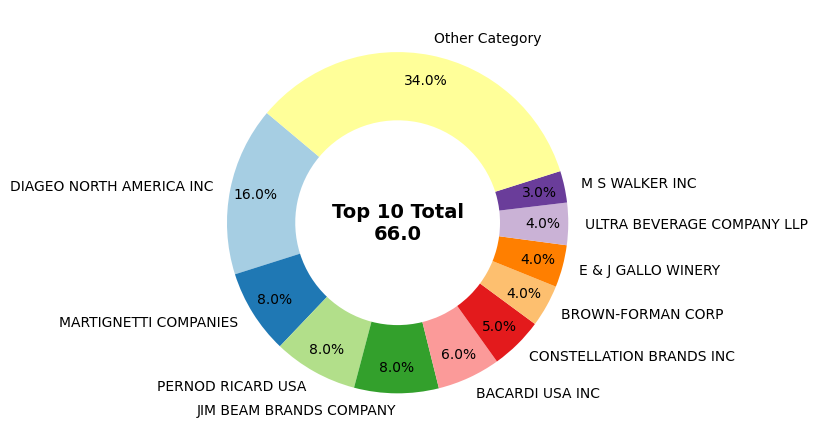

In [30]:
vendors = list(top_vendors['vendorname'])
purchase_contribution = list(top_vendors['purchase_contribution']*100)
total_contribution = sum(purchase_contribution)
remaining_contribution = 100-total_contribution
total = sum(purchase_contribution)

#Append other category

vendors.append('Other Category')
purchase_contribution.append(remaining_contribution)

#Donut Chart

fig , ax = plt.subplots(figsize=(8,8))

wedges, texts, autotexts = ax.pie(
    purchase_contribution,
    labels=vendors,
    autopct='%1.1f%%',   # show percentages
    startangle=140,       # rotate chart
    colors=plt.cm.Paired.colors,
    pctdistance=0.85,
    wedgeprops={'width':0.4}
)

plt.text(0, 0, f'Top 10 Total\n{total}', ha='center', va='center', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show

Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost saving ?

In [32]:
df.columns

Index(['vendorname', 'vendornumber', 'brand', 'description', 'purchaseprice',
       'volume', 'actualprice', 'totalquantity', 'totalpurchasedollars',
       'totalsalesdollars', 'totalsalesprice', 'totalsalesquantity',
       'totalexcisetax', 'total_freight', 'grossprofit', 'profitmargin',
       'stockturnover', 'sales/purchase_ratio'],
      dtype='object')

In [33]:
df['unitpurchaseprice']=df['totalpurchasedollars']/df['totalquantity']

In [34]:
df['unitpurchaseprice']

0        0.71
1        1.47
2        0.74
3        0.39
4        1.32
        ...  
8559    21.89
8560    16.17
8561    18.24
8562    23.19
8563    26.27
Name: unitpurchaseprice, Length: 8564, dtype: float64

In [35]:
df

,vendorname,vendornumber,brand,description,purchaseprice,volume,actualprice,totalquantity,totalpurchasedollars,totalsalesdollars,totalsalesprice,totalsalesquantity,totalexcisetax,total_freight,grossprofit,profitmargin,stockturnover,sales/purchase_ratio,unitpurchaseprice
0,PROXIMO SPIRITS INC.,7245,3065,Three Olives Grape Vodka,0.71,50.0,0.99,1,0.71,85.14,33.66,86.0,4.46,38994.78,84.43,99.166079,86.000000,119.915493,0.71
1,DIAGEO NORTH AMERICA INC,3960,6127,The Club Strawbry Margarita,1.47,200.0,1.99,1,1.47,143.28,77.61,72.0,15.12,257032.07,141.81,98.974037,72.000000,97.469388,1.47
2,HEAVEN HILL DISTILLERIES,3924,9123,Deep Eddy Vodka,0.74,50.0,0.99,2,1.48,1.98,0.99,2.0,0.10,14069.87,0.50,25.252525,1.000000,1.337838,0.74
3,SAZERAC CO INC,8004,5683,Dr McGillicuddy's Apple Pie,0.39,50.0,0.49,6,2.34,65.66,1.47,134.0,7.04,50293.62,63.32,96.436186,22.333333,28.059829,0.39
4,WINE GROUP INC,9815,8527,Concannon Glen Ellen Wh Zin,1.32,750.0,4.99,2,2.64,15.95,10.96,5.0,0.55,27100.41,13.31,83.448276,2.500000,6.041667,1.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,DIAGEO NORTH AMERICA INC,3960,3545,Ketel One Vodka,21.89,1750.0,29.99,138109,3023206.01,4223107.62,545778.28,135838.0,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89
8560,DIAGEO NORTH AMERICA INC,3960,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682,3261197.94,4475972.88,420050.01,200412.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17
8561,PERNOD RICARD USA,17035,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407,3418303.68,4538120.60,461140.15,187140.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24
8562,MARTIGNETTI COMPANIES,4425,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038,3804041.22,4819073.49,561512.37,160247.0,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19


In [36]:
df['ordersize'] = pd.qcut(df['totalquantity'], q=3, labels = ['small','medium','large'])

In [38]:
df[['ordersize','totalquantity']]

,ordersize,totalquantity
0,small,1
1,small,1
2,small,2
3,small,6
4,small,2
...,...,...
8559,large,138109
8560,large,201682
8561,large,187407
8562,large,164038


In [39]:
df.groupby('ordersize')[['unitpurchaseprice']].mean()

,unitpurchaseprice
ordersize,
small,39.068186
medium,15.486414
large,10.777625


<Axes: xlabel='ordersize', ylabel='unitpurchaseprice'>

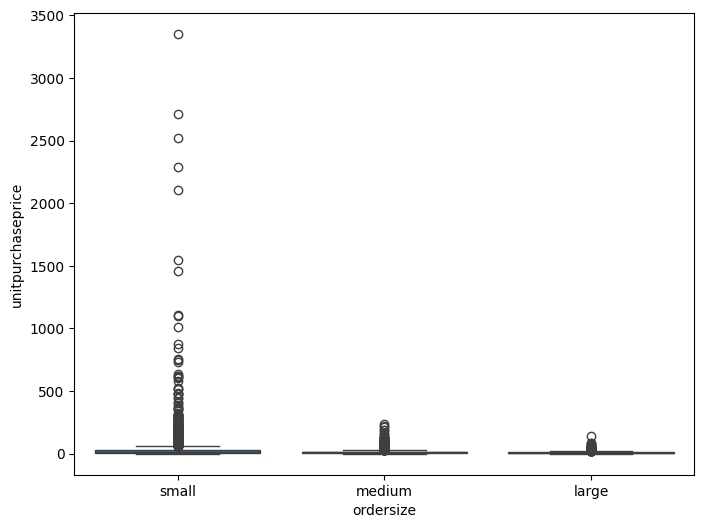

In [40]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x='ordersize',y='unitpurchaseprice')

Which vendors have low inventory turnover, indicating excess stock and slow moving products ?

In [48]:
df[df['stockturnover']<1].groupby('vendorname')[['stockturnover']].mean().sort_values('stockturnover').head(10)

,stockturnover
vendorname,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


How much capital is locked in unsold inventory and which vendor contributes mmost to it ?

In [52]:
df['unsoldinventoryvalue'] = (df['totalquantity']-df['totalsalesquantity'])*df['purchaseprice']

In [60]:
print(f'Total unsold capital is {format_dollars(df['unsoldinventoryvalue'].sum())}')

Total unsold capital is 2.71 M


In [76]:
inventory_value_per_vendor = df.groupby('vendorname')['unsoldinventoryvalue'].sum().reset_index()

inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by = 'unsoldinventoryvalue',ascending = False)
inventory_value_per_vendor = inventory_value_per_vendor['unsoldinventoryvalue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

25     722.21 K
46     554.67 K
68     470.63 K
116    401.96 K
30     228.28 K
79     198.44 K
11     177.73 K
20     133.62 K
61     126.48 K
77     118.60 K
Name: unsoldinventoryvalue, dtype: object

What is 95% confidence intervals for profit margins of top performing and low-performing vendors ?

In [78]:
top_threshold = df['totalsalesdollars'].quantile(0.75)
low_threshold = df['totalsalesdollars'].quantile(0.25)

In [79]:
top_vendors = df[df['totalsalesdollars']>=top_threshold]['profitmargin']
low_vendors = df[df['totalsalesdollars']<=low_threshold]['profitmargin']

In [86]:
def confidence_intervals(data , confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data,ddof=1)/np.sqrt(len(data))
    t_critical = stats.t.ppf((1+confidence)/2, df = len(data)-1)
    margin_of_error = t_critical * std_err
    return mean_val , mean_val - margin_of_error , mean_val + margin_of_error

In [90]:
top_mean, top_lower, top_upper = confidence_intervals(top_vendors)
low_mean, low_lower, low_upper = confidence_intervals(low_vendors)

print(f'Top vendors 95% Mean = {top_mean:.2f}, CI = {top_lower:.2f}, {top_upper:.2f}')
print(f'Low vendors 95% Mean = {low_mean:.2f}, CI = {low_lower:.2f}, {low_upper:.2f}')

Top vendors 95% Mean = 31.18, CI = 30.74, 31.61
Low vendors 95% Mean = 41.57, CI = 40.50, 42.64


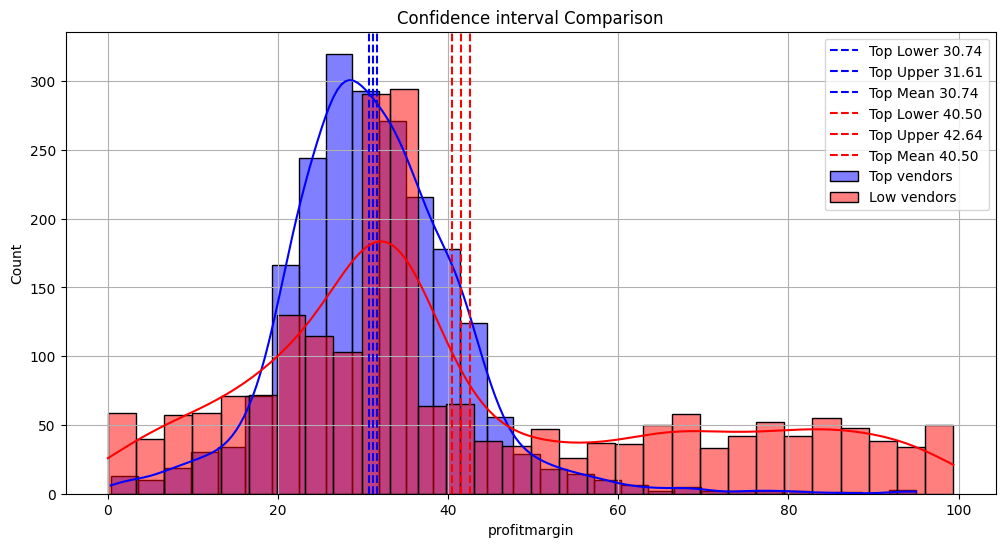

In [111]:
plt.figure(figsize=(12,6))

sns.histplot(x=top_vendors,kde= True,color='blue',bins=30,alpha=0.5,label='Top vendors')
plt.axvline(top_lower,color='blue',linestyle='--',label= f'Top Lower {top_lower:.2f}')
plt.axvline(top_upper,color='blue',linestyle='--',label= f'Top Upper {top_upper:.2f}')
plt.axvline(top_mean,color='blue',linestyle='--',label= f'Top Mean {top_lower:.2f}')


sns.histplot(x=low_vendors,kde= True,color='red',bins=30,alpha=0.5,label='Low vendors')
plt.axvline(low_lower,color='red',linestyle='--',label= f'Top Lower {low_lower:.2f}')
plt.axvline(low_upper,color='red',linestyle='--',label= f'Top Upper {low_upper:.2f}')
plt.axvline(low_mean,color='red',linestyle='--',label= f'Top Mean {low_lower:.2f}')

plt.title('Confidence interval Comparison')
plt.legend()
plt.grid(True)
plt.show()

Is there a significant difference in profit margins between top-performing and low-performing vendors ?

Hypothesis :

Ho (Null Hypothesis): There is no significat difference in mean profit margin of top performing and low performing vendors.

H1 (Alternate Hypothesis): The mean profit margin of top performing and low performing vendors are different.


In [119]:
#Perform two sample t-test

t_stat, p_value = ttest_ind(top_vendors, low_vendors,equal_var =False)
print(f'T-Statistic : {t_stat:.2f}, P-Value: {p_value:.2f}')

if p_value<0.05:
    print("There is significant difference in mean value of Profit Margins for top and Low performing vendors")
else:
    print("Failed to reject : There is no difference")
        
                            

T-Statistic : -17.67, P-Value: 0.00
There is significant difference in mean value of Profit Margins for top and Low performing vendors
